<a href="https://colab.research.google.com/github/NishaniKasineshan/DeepLearning_Tuts/blob/main/HandWrittenDigits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Import And Split The Dataset


In [ ]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data();

11501568/11490434 [==============================] - 0s 0us/step


Inspecting Data and Data Visualization

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[0].shape#2 dimension

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

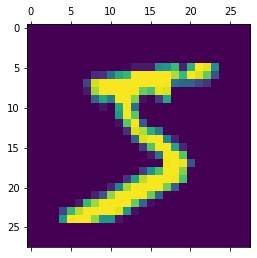

In [ ]:
plt.matshow(X_train[0])

In [ ]:
Y_train[0]

5

In [ ]:
X_train=X_train/255#Scaling must be done in order to standardize the data in a fixed range so that one significant number doesn't impact the model just because of their large magnitude
X_test=X_test/255

In [ ]:
#Flatten the data
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)
X_train_flatten.shape

(60000, 784)

In [ ]:
X_train_flatten[0]#1 dimension

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Simple Neural Network Without Hidden Layers

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4737 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9258


[0.2661174237728119, 0.9258000254631042]

In [ ]:
y_predicted=model.predict(X_test_flatten)
y_predicted[5]

array([5.9371567e-05, 9.9740356e-01, 5.2240843e-01, 3.9323178e-01,
       6.6362023e-03, 1.6593993e-02, 6.6971183e-03, 5.5598760e-01,
       5.6381536e-01, 1.7129093e-01], dtype=float32)

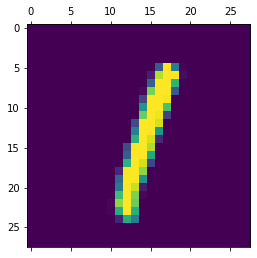

In [ ]:
plt.matshow(X_test[5])

In [ ]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[5])

1

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    3,    0,    6,    3,    2,    2,    1],
       [   0, 1108,    3,    3,    0,    1,    3,    2,   15,    0],
       [   5,    7,  932,   18,    8,    2,   10,   10,   37,    3],
       [   2,    0,   18,  933,    0,   18,    1,    9,   21,    8],
       [   1,    1,    5,    1,  919,    0,    8,    4,   11,   32],
       [   9,    2,    5,   45,    9,  766,    8,    9,   33,    6],
       [  12,    3,    8,    1,    8,   22,  898,    2,    4,    0],
       [   1,    5,   23,    8,    8,    0,    0,  948,    2,   33],
       [   6,    6,    7,   22,    9,   20,    7,   11,  878,    8],
       [  11,    7,    1,   12,   26,    5,    0,   26,    6,  915]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

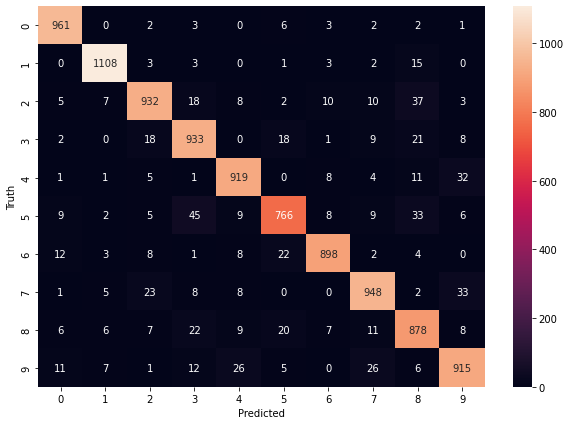

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Hidden Layer

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9846


In [ ]:
#Accuracy has increased when a hidden layer is added. It takes little more time before since it takes more computational effort now

In [ ]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9759


[0.07983461022377014, 0.9758999943733215]

In [ ]:
y_predicted=model.predict(X_test_flatten)
y_predicted[5]

array([1.7938018e-04, 9.9990427e-01, 1.3430506e-02, 8.6471438e-03,
       1.1818308e-01, 2.8146504e-05, 4.7758222e-04, 8.0714107e-01,
       1.1613962e-01, 6.9527030e-03], dtype=float32)

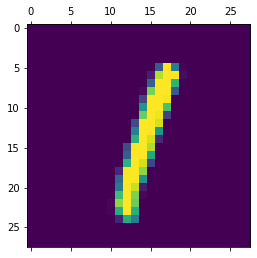

In [ ]:
plt.matshow(X_test[5])

In [ ]:
np.argmax(y_predicted[5])

1

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    4,    2,    0,    2,    3,    1,    2,    2],
       [   0, 1124,    2,    2,    0,    1,    2,    1,    3,    0],
       [   2,    2, 1014,    2,    0,    1,    1,    6,    4,    0],
       [   0,    0,    5, 1000,    0,    0,    1,    1,    2,    1],
       [   2,    0,    2,    0,  952,    0,   10,    3,    0,   13],
       [   2,    1,    0,   20,    2,  853,    6,    2,    6,    0],
       [   4,    3,    2,    1,    2,    3,  939,    0,    4,    0],
       [   0,    8,   16,    3,    1,    0,    0,  996,    1,    3],
       [   2,    3,    3,   15,    3,    3,    1,    2,  939,    3],
       [   0,    3,    0,   10,    5,    2,    2,    6,    3,  978]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

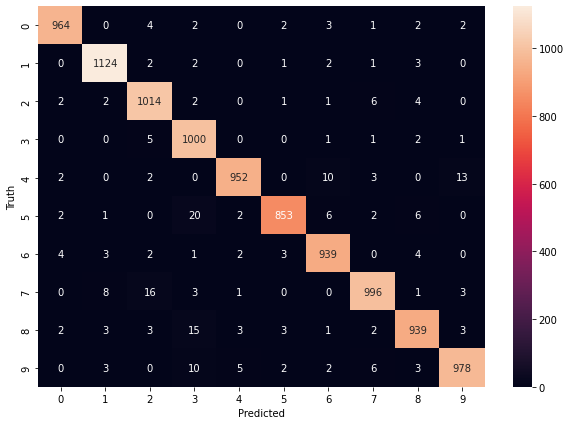

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2708 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0520 - accuracy: 0.9840


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9749


[0.08226757496595383, 0.9749000072479248]

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    1,    0,    0,    1,    1,    1,    0],
       [   1, 1123,    4,    0,    0,    2,    3,    1,    1,    0],
       [   6,    2, 1012,    2,    1,    0,    2,    5,    2,    0],
       [   1,    0,    2,  992,    0,    3,    0,    5,    2,    5],
       [   2,    0,    5,    1,  951,    0,    1,    3,    1,   18],
       [   2,    0,    0,   12,    1,  867,    4,    1,    3,    2],
       [   7,    3,    5,    1,    3,   13,  925,    0,    1,    0],
       [   2,    4,    8,    1,    0,    0,    0, 1006,    0,    7],
       [   6,    0,   10,   21,    2,    5,    5,    8,  911,    6],
       [   1,    4,    0,    4,    4,    3,    1,    5,    0,  987]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

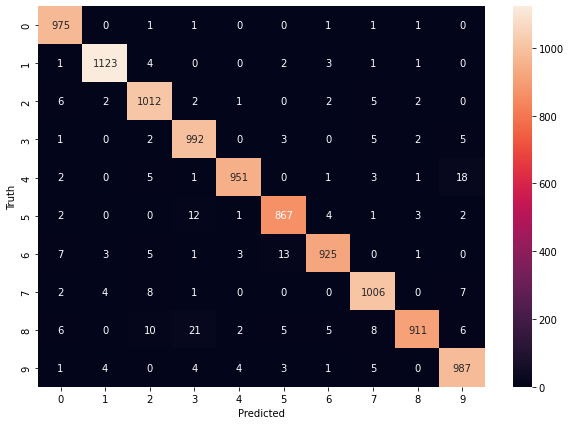

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding more Hidden layers


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0757 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0464 - accuracy: 0.9851


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9784


[0.07492843270301819, 0.9783999919891357]

Increasing the epochs


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2770 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1250 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9777


[0.08183039724826813, 0.9776999950408936]

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    3,    1,    0,    1,    3,    2,    4,    0],
       [   0, 1122,    3,    2,    0,    0,    2,    1,    5,    0],
       [   2,    2, 1003,    4,    2,    0,    3,    4,   12,    0],
       [   0,    0,    5,  984,    0,    8,    0,    3,    1,    9],
       [   1,    0,    1,    0,  963,    1,    6,    1,    3,    6],
       [   2,    0,    1,    4,    1,  873,    1,    2,    3,    5],
       [   4,    3,    2,    1,    2,   13,  929,    0,    4,    0],
       [   1,    1,    6,    1,    2,    0,    0, 1005,    8,    4],
       [   1,    0,    4,    5,    2,    4,    0,    2,  954,    2],
       [   1,    2,    0,    5,    9,    2,    0,    7,    5,  978]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

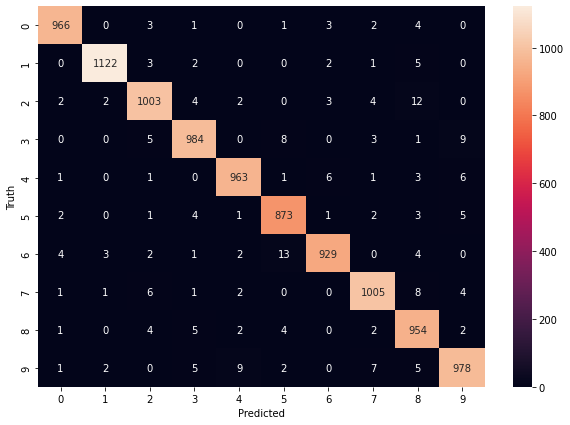

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using softmax activation function

In [ ]:
#Softmax converts a vector of values to a probability distribution.

#The elements of the output vector are in range (0, 1) and sum to 1.

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1234 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9844


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9769


[0.07363303005695343, 0.9768999814987183]

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    2,    2,    2,    1,    2,    1],
       [   0, 1124,    2,    1,    0,    0,    2,    2,    4,    0],
       [   6,    3, 1007,    0,    3,    0,    2,    7,    4,    0],
       [   2,    1,    0,  989,    1,    4,    0,    9,    2,    2],
       [   1,    0,    4,    0,  966,    0,    1,    4,    1,    5],
       [   3,    1,    0,   10,    0,  866,    5,    1,    5,    1],
       [   8,    3,    2,    1,    5,    3,  933,    0,    3,    0],
       [   1,    3,    6,    0,    0,    1,    0, 1013,    1,    3],
       [   8,    1,    1,    2,    6,    3,    3,    5,  944,    1],
       [   3,    6,    0,    6,   12,    3,    0,   17,    3,  959]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

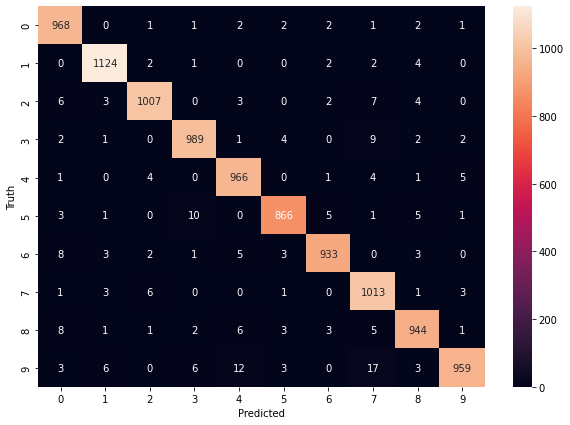

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using softplus activation function for hidden layer

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='softplus'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3285 - accuracy: 0.9065
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1676 - accuracy: 0.9513
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0870 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9789


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9757


[0.08125948160886765, 0.9757000207901001]

Using SGD optimizer

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6422 - accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.9066
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2879 - accuracy: 0.9189
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9275
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2367 - accuracy: 0.9341


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2231 - accuracy: 0.9382


[0.22305837273597717, 0.9381999969482422]

In [ ]:
#Adam is better optimizer than SGD
#Softmax is better than sigmoid